# **Red Neuronal Artificial (RNA) - Multilayer Perceptron**
En este cuaderno se encontrará:
* Modelar RNA (MLP) con matrices
* Uso básico de librería Keras (Tensorflow)
* Dar solución a problemas de separación donde el perceptrón no tuvo buenos resultados

## Librerías a utilizar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras

## Datos a Utilizar (Compuerta XOR)

In [2]:
# cargamos las 4 combinaciones de las compuertas
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
# y estos son los resultados que se obtienen, en el mismo orden
target_data = np.array([[0],[1],[1],[0]], "float32")

## Visualización de los datos

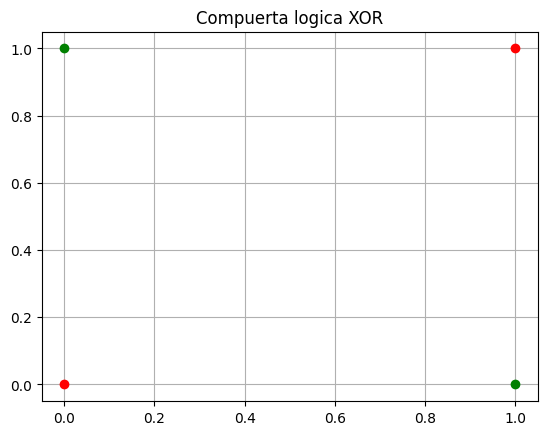

In [3]:
for i in range(4):
  if target_data[i]==0:
    plt.plot(training_data[i,0],training_data[i,1],'ro')
  else:
    plt.plot(training_data[i,0],training_data[i,1],'go')
plt.grid()
plt.title("Compuerta logica XOR")
plt.show()

# Definición de hiperparametros


*   alpha: Tasa de aprendizaje
*   N: Número de epocas. Total de iteraciones



In [4]:
alpha = 0.001
N = 300

## Estructura de la red
* 1 Capa oculta de 16 neuronas con funcion de activación Relu
* 1 Capa de salida de 1 neurona con función de activación Sigmoid

# Inicialización de parametros (pesos sinapticos)

In [5]:
Wco = np.random.rand(16,3)
Ws = np.random.rand(1,17)

# Entrenamiento

In [6]:
# @title Feedforward
def feedforward(X,W,fun='linear'):
  neta = np.dot(W,X.T)
  if fun=='linear':
    return neta
  elif fun == 'sigmoid':
    return sigmoid(neta)
  elif fun == 'tanh':
    return tanh(neta)
  elif fun == 'relu':
    return relu(neta)
  elif fun == 'step':
    return step(neta)
  else:
    print("No se identifica la función de activación especificada, se establece por defecto función lineal")
    return neta

In [7]:
# @title Funciones de activación
def sigmoid(x):
    """Función de activación Sigmoid."""
    return 1 / (1 + np.exp(-x))

def tanh(x):
    """Función de activación Tanh."""
    return np.tanh(x)

def relu(x):
    """Función de activación ReLU."""
    return np.maximum(0, x)
def step(x):
    """Función de activación Step."""
    return x>=0


In [8]:
# @title Derivadas de las funciones de activación
def sigmoid_der(x):
  """Derivada de la función de activación Sigmoid."""
  return (x)*(1-(x))
def relu_der(x):
  """Derivada de la función de activación ReLU."""
  return x>=0

### Algunas funciones de activación
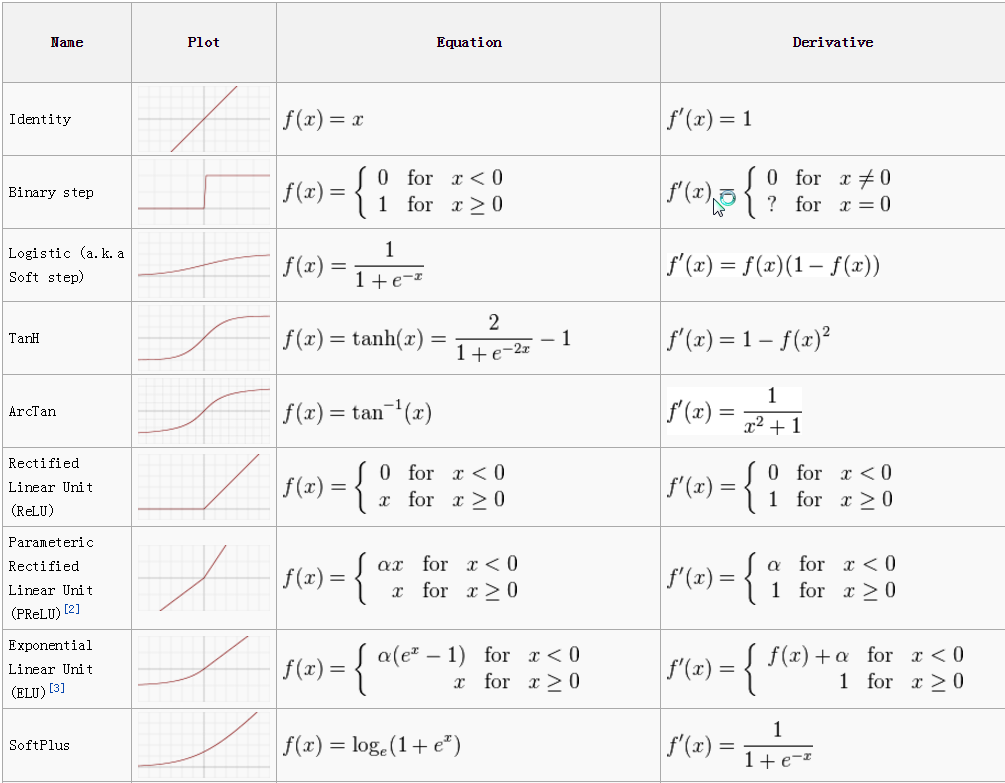

# Ciclo de entrenamiento

In [9]:
x = np.hstack([np.ones((4,1)),training_data])
for epoch in range(N):
  # Feedforward
  salidaOculta = feedforward(x,Wco,'relu')
  salida = feedforward(np.hstack([np.ones((4,1)),salidaOculta.T]),Ws,'sigmoid')
  # Calculo del error
  #error = target_data.T - salida
  error = np.square(np.subtract(target_data.T, salida)).mean(axis=0)
  # Actualización de pesos
  Ws = Ws + alpha*np.dot(error,np.hstack([np.ones((4,1)),salidaOculta.T]))
  Wco = Wco + alpha*np.dot(sigmoid_der(salida),x)
  if (epoch+1)%10==0:
    print("Epoca: ",epoch+1)

Epoca:  10
Epoca:  20
Epoca:  30
Epoca:  40
Epoca:  50
Epoca:  60
Epoca:  70
Epoca:  80
Epoca:  90
Epoca:  100
Epoca:  110
Epoca:  120
Epoca:  130
Epoca:  140
Epoca:  150
Epoca:  160
Epoca:  170
Epoca:  180
Epoca:  190
Epoca:  200
Epoca:  210
Epoca:  220
Epoca:  230
Epoca:  240
Epoca:  250
Epoca:  260
Epoca:  270
Epoca:  280
Epoca:  290
Epoca:  300


In [10]:
# @title Evaluación
# Feedforward
salidaOculta = feedforward(x,Wco,'relu')
salida = feedforward(np.hstack([np.ones((4,1)),salidaOculta.T]),Ws,'sigmoid')
print(np.round(salida))
print(salida)

[[1. 1. 1. 1.]]
[[0.99987088 0.99999993 0.99999999 1.        ]]


## Modelado y Entrenamiento de la RNA (Keras)

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(16, input_dim=2, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65 (260.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

### Compilación de la RNA

In [12]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mse'])

### Entrenamiento de la RNA

In [13]:
model.fit(training_data, target_data, epochs=300)

Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.2297 - mse: 0.2297
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2293 - mse: 0.2293
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2288 - mse: 0.2288
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.2284 - mse: 0.2284
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2279 - mse: 0.2279
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2275 - mse: 0.2275
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2271 - mse: 0.2271
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.2266 - mse: 0.2266
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.2262 - mse: 0.2262
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.2258 - mse: 0.2258
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.2254 - mse: 0.2254
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2250 - mse: 0.2250
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step 

In [14]:
np.sqrt(0.1241)

0.35227829907617075

## Evaluación del modelo RNA

In [15]:
scores = model.evaluate(training_data, target_data)
print("\n%s: %.2f" % (model.metrics_names[1], scores[1]))
print(np.round(model.predict(training_data)))
print(model.predict(training_data))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.1237 - mse: 0.1237

compile_metrics: 0.12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[0.]
 [1.]
 [1.]
 [0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[0.42673308]
 [0.6504072 ]
 [0.6883172 ]
 [0.3056787 ]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


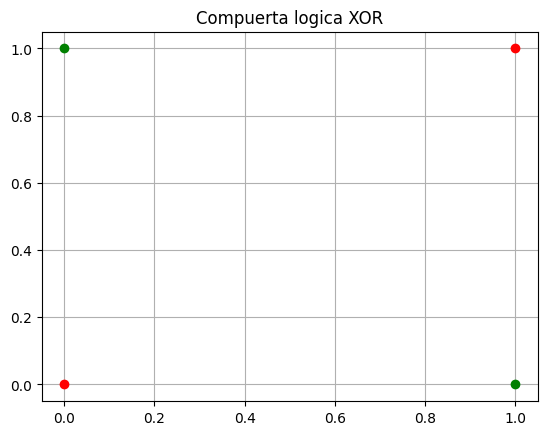

In [17]:
prediccion = model.predict(training_data)
for i in range(4):
  if prediccion[i]<0.5:
    plt.plot(training_data[i,0],training_data[i,1],'ro')
  else:
    plt.plot(training_data[i,0],training_data[i,1],'go')
plt.grid()
plt.title("Compuerta logica XOR")
plt.show()

In [16]:
model.weights

[<Variable path=sequential/dense/kernel, shape=(2, 16), dtype=float32, value=[[ 0.31622064  0.09968818 -0.48421377  0.15427761  0.3087137  -0.47554603
    0.20901273  0.7799176  -0.00590081  0.14276583 -0.55418587  0.38788566
   -0.0022137  -0.226336    0.53191626  0.19853641]
  [ 0.24884671  0.09814174 -0.48994267  0.16933167  0.3083912   0.42114857
    0.20869887 -0.7799806  -0.01606041  0.13912623  0.8154252  -0.3876507
   -0.4581526   0.04866866 -0.5314452   0.1985054 ]]>,
 <Variable path=sequential/dense/bias, shape=(16,), dtype=float32, value=[-2.4904087e-01 -9.9241078e-02  0.0000000e+00 -1.6840073e-01
  -3.0844805e-01  1.2037787e-03 -2.0826191e-01 -1.6785311e-04
  -1.0357382e-02 -1.4055985e-01 -3.5821271e-04 -1.5568300e-04
  -1.8277027e-02 -6.7905836e-02 -4.3091417e-04 -1.9861703e-01]>,
 <Variable path=sequential/dense_1/kernel, shape=(16, 1), dtype=float32, value=[[-0.6602999 ]
  [-0.1940806 ]
  [-0.0180102 ]
  [-0.36092287]
  [-0.36157075]
  [ 0.6186896 ]
  [-0.63734174]
  [ 0

# Ejercicio de practica

Realice el entrenamiento de una red neuronal artificial para llevar a cabo la tarea de regresión utilizando el dataset California Housing. Puede obtenerlo utilizando la libreria keras como se evidencia en el siguiente enlace:

https://www.tensorflow.org/api_docs/python/tf/keras/datasets/california_housing/load_data

In [ ]:
import pandas as pd

* Definir el modelo (la estructura = # capas, # nueronas, Funciones de activación)
* Definir hiperparametros (# de epocas, tasa de aprendizaje)
* compilar y entrenar con keras (dataset de entrenamiento)
* Obtener la metrica despues de entrenar
* Predecir con los datos de test (predict)
* Obtener la metrica de test
* Analizar el desempeno del modelo (comparar las metricas)

* LLevar a cabo este proceso de manera "manual" (numpy) [Siempre y cuando el modelo no sea profundo]